# ``"Vita da pollo"``

## Introduzione pratica a Python e alla Data Science

### Caricamento delle librerie necessarie

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Il dataset

**DESCRIZIONE**  
Un insieme di pulcini ("chicks") è stato diviso in diversi gruppi e per ognuno di essi, sin dalla nascita, è stata fornita una dieta alimentare diversa. Ogni animale è stato pesato di giorno in giorno monitorando così l'effetto del particolare metodo di allevamento.

In [2]:
!wget "https://raw.githubusercontent.com/fmardero/MLedulife/master/lesson_02/chickweight.csv"

--2019-10-13 15:58:36--  https://raw.githubusercontent.com/fmardero/MLedulife/master/lesson_02/chickweight.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8541 (8.3K) [text/plain]
Saving to: ‘chickweight.csv’

chickweight.csv     100%[===================>]   8.34K  --.-KB/s    in 0s      

2019-10-13 15:58:36 (126 MB/s) - ‘chickweight.csv’ saved [8541/8541]



In [0]:
df = pd.read_csv('chickweight.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
rownum    578 non-null int64
weight    578 non-null int64
Time      578 non-null int64
Chick     578 non-null int64
Diet      578 non-null int64
dtypes: int64(5)
memory usage: 22.7 KB


**Variabili**
* _weight_ &nbsp;&nbsp;peso del pulcino (in grammi)
* _Time_ &nbsp;&nbsp;&nbsp;&nbsp; giorni intercorsi tra la data di nascita del pulcino e quella di osservazione
* _Chick_ &nbsp;&nbsp;&nbsp; codice identificativo del pulcino
* _Diet_ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; codice identificativo della dieta

**Le variabili indipendenti hanno iniziale maiuscola**

### L'allevatore vuole massimizzare il peso dei pulcini al termine del periodo di osservazione
### Può scegliere tra una delle diverse diete sperimentate

## Eliminazione delle colonne inutili

In [0]:
df.drop(columns='rownum', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 4 columns):
weight    578 non-null int64
Time      578 non-null int64
Chick     578 non-null int64
Diet      578 non-null int64
dtypes: int64(4)
memory usage: 18.1 KB


## Controllo sui valori nulli

In [7]:
df.isnull().sum()

weight    0
Time      0
Chick     0
Diet      0
dtype: int64

## Riassunto dei dati disponibili

In [8]:
print('There are {} chickens fed with one of the {} diets and analyzed for {} days.'.format(len(df['Chick'].unique()), len(df['Diet'].unique()), df['Time'].max()))

There are 50 chickens fed with one of the 4 diets and analyzed for 21 days.


In [9]:
df.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


## Analisi dello sviluppo dei polli

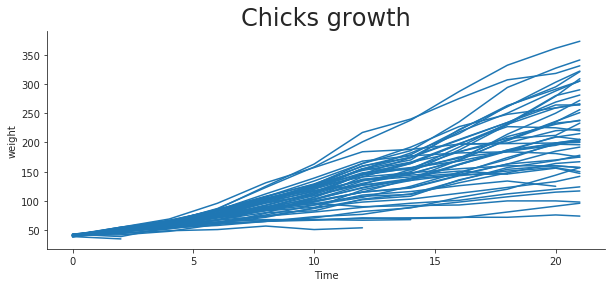

In [10]:
sns.set_style('ticks')
plt.figure(figsize=(10, 4))

sns.lineplot(x='Time',
             y='weight', 
             units='Chick',
             data=df, 
             estimator=None)

plt.title('Chicks growth', fontsize=24)
sns.despine()

**Non tutti i pulicini vivono fino al termine del periodo di osservazione!**

## Tasso di sopravvivenza

In [11]:
chicks_max_age = pd.pivot_table(data=df, values='Time', index='Chick', aggfunc='max')

chicks_max_age.rename(columns={'Time': 'max_age'}, inplace=True)

# Print transoposed matrix because of plot aesthetics
chicks_max_age[:10].T

Chick,1,2,3,4,5,6,7,8,9,10
max_age,21,21,21,21,21,21,21,20,21,21


In [12]:
max_age = chicks_max_age['max_age'].max()
chicks_max_age['survived'] = chicks_max_age['max_age'].apply(lambda x: 0 if x < max_age else 1)

chicks_max_age.head()

,max_age,survived
Chick,,
1,21,1
2,21,1
3,21,1
4,21,1
5,21,1


In [13]:
survived = chicks_max_age['survived'].sum()

# Survival rate
sur_rate = survived/len(chicks_max_age)

print('{} chickens of {} ({:.2%}) survived during the observation period.'.format(survived, len(chicks_max_age), sur_rate))

45 chickens of 50 (90.00%) survived during the observation period.


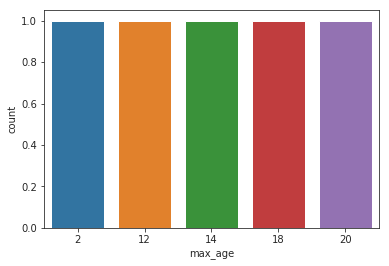

In [14]:
# Distribution of the age for chicks died prematurely
# (we use countplot instead of distplot because we have few data)
sns.countplot(x='max_age', data=chicks_max_age.loc[chicks_max_age['survived'] == 0])

**I dati sono pochi, ma ci permettono di ipotizzare che le morti premature non siano dovute a un fenomeno esogeno importante**  
Questo altrimenti avrebbe causato un picco di decessi

In [15]:
df = pd.merge(left=df, right=chicks_max_age, on='Chick')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 577
Data columns (total 6 columns):
weight      578 non-null int64
Time        578 non-null int64
Chick       578 non-null int64
Diet        578 non-null int64
max_age     578 non-null int64
survived    578 non-null int64
dtypes: int64(6)
memory usage: 31.6 KB


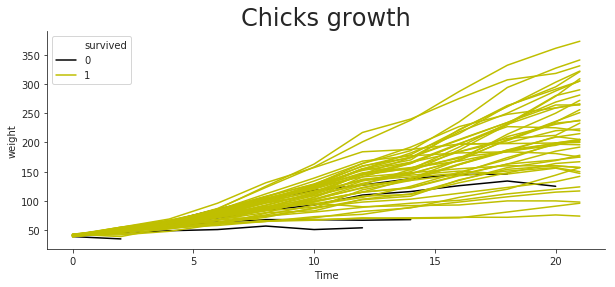

In [16]:
sns.set_style('ticks')
plt.figure(figsize=(10, 4))

sns.lineplot(x='Time',
             y='weight', 
             units='Chick',
             hue='survived',
             data=df, 
             estimator=None, 
             palette=['k', 'y'])

plt.title('Chicks growth', fontsize=24)
sns.despine()

## Analisi sul peso - Outliers

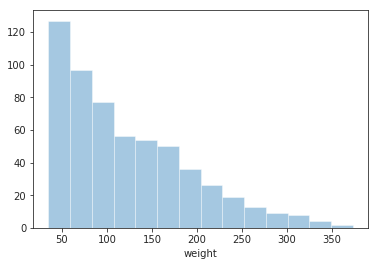

In [17]:
sns.distplot(df['weight'], kde=False, rug=False)

## Analisi dello sviluppo dei polli - RISPETTO ALLA DIETA

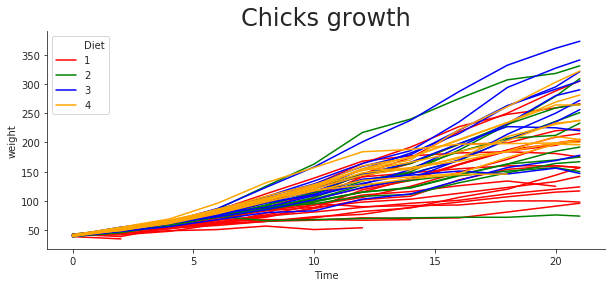

In [18]:
plt.figure(figsize=(10, 4))

sns.lineplot(x='Time',
             y='weight', 
             units='Chick',
             hue='Diet', # <-
             data=df, 
             estimator=None, 
             palette=['red', 'green', 'blue', 'orange'])

plt.title('Chicks growth', fontsize=24)
sns.despine()

**Equidistribuzione dei polli per dieta?**

In [19]:
pd.pivot_table(values='Chick', columns='Diet', data=df.loc[df['Time'] == df['max_age']], aggfunc='count')

Diet,1,2,3,4
Chick,20,10,10,10


## Rapporto di sopravvivenza

In [20]:
# "margins" parameter gives you the rows and columns subtotal
chicks_by_diet = pd.pivot_table(values='Chick', columns='Diet', index='survived', data=df.loc[df['Time'] == df['max_age']], margins=True, aggfunc='count')
chicks_by_diet.fillna(0, inplace=True)
chicks_by_diet

Diet,1,2,3,4,All
survived,,,,,
0,4.0,0.0,0.0,1.0,5
1,16.0,10.0,10.0,9.0,45
All,20.0,10.0,10.0,10.0,50


In [21]:
for col in chicks_by_diet.columns:
    sur_rate = chicks_by_diet.loc[1, col] / chicks_by_diet.loc['All', col]
    n = int(chicks_by_diet.loc['All', col])
    print('Diet: {:3}\tchicks: {:2d}\tsurvival rate: {:7.2%}'.format(col, n, sur_rate))

Diet:   1	chicks: 20	survival rate:  80.00%
Diet:   2	chicks: 10	survival rate: 100.00%
Diet:   3	chicks: 10	survival rate: 100.00%
Diet:   4	chicks: 10	survival rate:  90.00%
Diet: All	chicks: 50	survival rate:  90.00%


**La dieta "1" sembra causare un numero maggiore di decessi prematuri**  
L'ipotesi andrebbe testata su un campione più numeroso, soprattutto per quanto riguarda anche le altre diete

## Scegliere la dieta migliore

In [0]:
# Consider only the chicks that lived until the end of the obs. period
chicks_alive = df.loc[df['survived'] == 1]

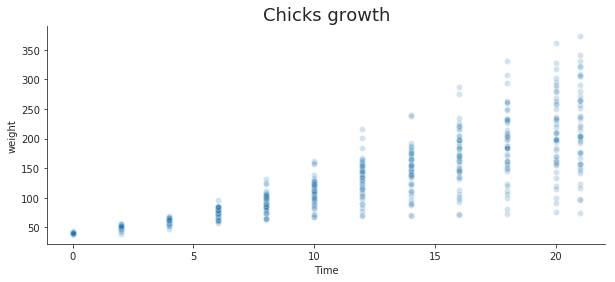

In [23]:
fig = plt.figure(figsize=(10, 4))

# Plot: datapoints
# "estimator" parameter in scatterplot is corrently not working (08-2019)
ax = sns.scatterplot(x='Time',
                     y='weight',
                     data=chicks_alive,
                     alpha=0.2)

ax.set_title('Chicks growth', fontsize=18)
sns.despine()

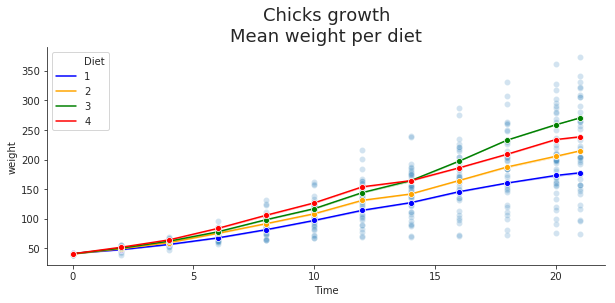

In [24]:
# Plot: weights mean
sns.lineplot(x='Time', 
             y='weight', 
             hue='Diet', 
             estimator='mean',
             ci=False,
             data=chicks_alive, 
             marker='o',
             palette=['blue', 'orange', 'green', 'red'], 
             ax=ax)

ax.set_title('Chicks growth\nMean weight per diet', fontsize=18)
fig

## Inferenza

### Ricerca del meccanismo generatore del fenomeno

### Per comprendere quale sia la miglior dieta conviene costruire un modello in grado di prevedere giorno per giorno, e per dieta, il peso del pulcino

### Oltre alla previsione puntuale è ideale considerare anche la variabilità di peso indotta dalla dieta

**Non dimentichiamoci del _survivial ratio_ della dieta!**

### Regressione lineare

Sia $t$ il giorno di osservazione e $y(t)$ e $\hat{y}(t)$ il peso rispettivamente osservato e previsto.

**Applicando la regressione lineare si determina, in pratica, un tasso costante $\gamma$ di aumento di peso per ogni tipo di dieta.**

$$\hat{y}(t) = m t + q \quad\text{e}\quad \hat{y}(0) = q$$
allora
$$\Delta(t)=\frac{y(t)-y(0)}{y(0)} = \frac{m t + q - q}{q} = \frac{m}{q}t = \gamma t$$


Il valore di $\gamma$ evidenzia quindi di quanto varia il peso da $t-1$ a $t$ (rispetto al peso "base"):

$$
\begin{align}
    \Delta(t) - \Delta(t-1) &= \frac{y(t)-y(0)}{y(0)} - \frac{y(t-1)-y(0)}{y(0)} \\
    &= \frac{y(t)-y(t-1)}{y(0)}\\
   &= \gamma
\end{align}
$$

**Si ipotizza che la dieta agisca nello stesso modo per ogni fase di sviluppo del pulcino!**

### Definizione del modello

In [0]:
from sklearn.linear_model import LinearRegression

# Define the model
reg = LinearRegression()

### Training

In [0]:
reg_data = {}

# Train a model for all the diets
for diet in chicks_alive['Diet'].unique():
    # condition
    cond = chicks_alive['Diet'] == diet
    
    # fearures
    X = chicks_alive.loc[cond, 'Time']
    X = X.values.reshape(-1, 1)

    # target variable
    y = chicks_alive.loc[cond, 'weight']
    
    # Train the model
    reg.fit(X, y)

    # Save params (m, q) and R-squared metric
    reg_data[diet] = {'m': reg.coef_[0], 'q': reg.intercept_, 'r2': reg.score(X, y)}

In [27]:
# Print the score (R-squared)
for diet in chicks_alive['Diet'].unique():
    print('Diet {}\t - \tR-squared : {:.1%}\tm={:6.2f}\tq={:6.2f}'.format(diet, 
                                                                          reg_data[diet]['r2'],
                                                                          reg_data[diet]['m'],
                                                                          reg_data[diet]['q']))

Diet 1	 - 	R-squared : 66.2%	m=  6.95	q= 31.79
Diet 2	 - 	R-squared : 66.9%	m=  8.61	q= 28.63
Diet 3	 - 	R-squared : 80.7%	m= 11.42	q= 18.25
Diet 4	 - 	R-squared : 91.5%	m=  9.88	q= 30.52


In [0]:
fig = plt.figure(figsize=(14, 5))

ax = sns.scatterplot(x='Time',
                     y='weight',
                     data=chicks_alive,
                     alpha=0.2)

for diet in reg_data.keys():
    m = reg_data[diet]['m']
    q = reg_data[diet]['q']
    t_min = chicks_alive['Time'].min()
    t_max = chicks_alive['Time'].max()
    sns.lineplot(x=[t_min, t_max], y=[m*t_min+q, m*t_max+q], lw=2.5)


plt.title('Chicks growth\nPredicted weight per diet', fontsize=18)
plt.legend(title='Diet', labels=list(reg_data.keys()))
sns.despine()

# Prevent image to be shown due to its dimensions
plt.close()

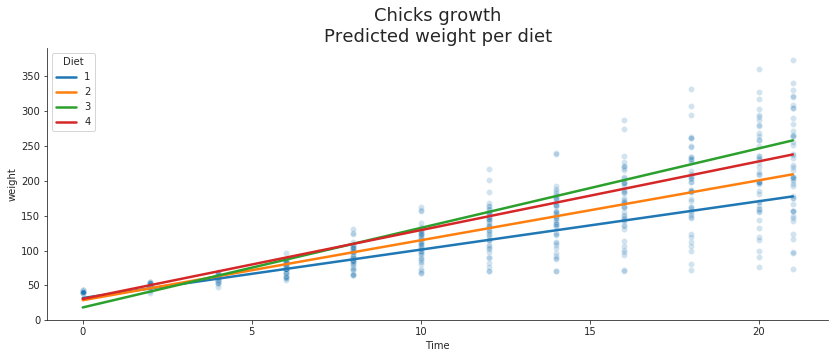

In [29]:
fig

**Com'è possibile che in $t=0$ i modelli predicano pesi diversi?!**

**Alla nascita del pulcino la dieta non interviene!!**

### Occorre "forzare" un'intercetta comune a tutti i modelli

Purtroppo _sklearn_ non permette di dichiarare preventivamente (e non allenare) alcuni parametri del modello. Consente unicamente di porre l'intercetta a 0.

> La soluzione è di inglobare il modulo LinearRegression in quello di TransformedTargetRegressor.

Infatti si supponga di porre $q = cost.$ per ogni modello di dieta.

Allora

$$\hat{y}(t) = mt+q = \hat{y}_{q=0}(t) + q$$

È quindi possibile allenare un modello a intercetta nulla che fornisce previsioni $\hat{y}_{q=0}$ rispetto ai pesi osservati $y-q$; la previsione corretta si ottiene risommando $q$ a $\hat{y}_{q=0}$ e ottenendo $\hat{y}$.

### Calcolo dell'intercetta

In [30]:
# We use mean, we could have used mode, median or other metrics
fixed_q = chicks_alive.loc[chicks_alive['Time'] == 0, 'weight'].mean()

print('Intercept computed is {:.2f} over {} weights at t=0.'.format(fixed_q, sorted(list(chicks_alive.loc[chicks_alive['Time'] == 0, 'weight'].unique()))))

Intercept computed is 41.07 over [39, 40, 41, 42, 43] weights at t=0.


### Definizione del modello

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

# Define the model
reg = LinearRegression(fit_intercept=False) # fix intercept to 0
tt_reg = TransformedTargetRegressor(regressor=reg, 
                                    func=lambda x: x - fixed_q, 
                                    inverse_func=lambda x: x + fixed_q)

**Per maggiori info**

``?TransformedTargetRegressor``

----

**Dalla documentazione:**

The computation during ``fit`` is:

    regressor.fit(X, func(y))

The computation during ``predict`` is:

    inverse_func(regressor.predict(X))

### Training

In [0]:
tt_reg_data = {}

# Train a model for all the diets
for diet in chicks_alive['Diet'].unique():
    # condition
    cond = chicks_alive['Diet'] == diet
    
    # fearures
    X = chicks_alive.loc[cond, 'Time']
    X = X.values.reshape(-1, 1)

    # target variable
    y = chicks_alive.loc[cond, 'weight']
    
    # Train the model
    tt_reg.fit(X, y)

    # Save params (m, q) and R-squared metric
    tt_reg_data[diet] = {'m': tt_reg.regressor_.coef_[0], 'q': fixed_q, 'r2': tt_reg.score(X, y)}

In [33]:
# Print the score (R-squared)
for diet in chicks_alive['Diet'].unique():
    print('Diet {}\t * reg Model\t - \tR-squared : {:.1%}\tm={:6.2f}\tq={:6.2f}'.format(diet, 
                                                                                        reg_data[diet]['r2'],
                                                                                        reg_data[diet]['m'],
                                                                                        reg_data[diet]['q']))
    print('\t * tt_reg Model\t - \tR-squared : {:.1%}\tm={:6.2f}\tq={:6.2f}\n'.format(tt_reg_data[diet]['r2'],
                                                                                      tt_reg_data[diet]['m'],
                                                                                      tt_reg_data[diet]['q']))

Diet 1	 * reg Model	 - 	R-squared : 66.2%	m=  6.95	q= 31.79
	 * tt_reg Model	 - 	R-squared : 65.5%	m=  6.33	q= 41.07

Diet 2	 * reg Model	 - 	R-squared : 66.9%	m=  8.61	q= 28.63
	 * tt_reg Model	 - 	R-squared : 66.1%	m=  7.79	q= 41.07

Diet 3	 * reg Model	 - 	R-squared : 80.7%	m= 11.42	q= 18.25
	 * tt_reg Model	 - 	R-squared : 78.7%	m=  9.91	q= 41.07

Diet 4	 * reg Model	 - 	R-squared : 91.5%	m=  9.88	q= 30.52
	 * tt_reg Model	 - 	R-squared : 90.9%	m=  9.18	q= 41.07



**Le previsioni sono ovviamente peggiorate, ma ora il coefficiente "q" è costante**

In [0]:
fig = plt.figure(figsize=(14, 5))

ax = sns.scatterplot(x='Time',
                     y='weight',
                     data=chicks_alive,
                     alpha=0.2)

for diet in tt_reg_data.keys():
    m = tt_reg_data[diet]['m']
    q = tt_reg_data[diet]['q']
    t_min = chicks_alive['Time'].min()
    t_max = chicks_alive['Time'].max()
    sns.lineplot(x=[t_min, t_max], y=[m*t_min+q, m*t_max+q], lw=2.5)


plt.title('Chicks growth\nPredicted weight per diet', fontsize=18)
plt.legend(title='Diet', labels=list(tt_reg_data.keys()))
sns.despine()

# Prevent image to be shown due to its dimensions
plt.close()

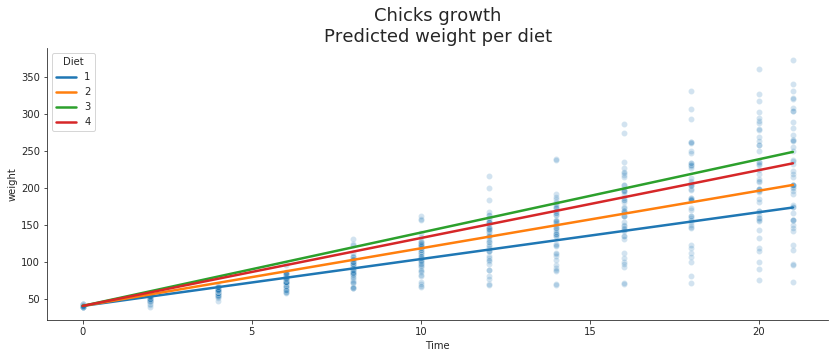

In [35]:
fig

### Variabilità delle previsioni
Per valutare le capacità predittive di un algoritmo e la variabilità delle sue previsioni ci si concentra sugli errori che questo produce rispetto ai valori osservati nella realtà.

Si definisce quindi di _residuo_ $r_i$ per il valore osservato $y_i$ rispetto alla previsione $\hat{y}_i$ come:
$$ r_i = y_i - \hat{y}_i = y_i - f(x_i)$$

Se i residui dipendono dal particolare datapoint allora si può scrivere
$$r_i(x_i) = y_i - f(x_i)$$
Ciò accade generalmente quando il campione è eteroschedastico, cioè quando all'interno del dataset esitono popolazioni di dati che hanno variabilità (varianza) diversa. In caso contrario si parla di campione omoschedastico.

Fenomeni di eteroschedasticità si possono presentare ad esempio quando mancano variabili esplicative del fenomeno o, nelle serie storiche, quando il fenomeno è autoregressivo, cioè il valore successivo $y(t)$ dipende non solo dalle covariate ma anche da quello/i precedente/i $y(t-1)$/ \{ $y(t-1),\dots,y(t-k) \}$.

**Attenzione!**  
> L'eteroschedasticità è una proprietà del camione, non dei residui! 

Se i residui mostrano una forte dipendenza dal valore delle covariate allora il campione potrebbe anche essere omoschedastico ma comprendere importanti outlier!

#### Considerazioni sul campione di dati

Si osservi dal grafico seguente come la variabilità dei pesi aumenta all'aumentare del tempo (**campione eteroschedastico**). L'assenza di outliers è inoltre già stata appurata.

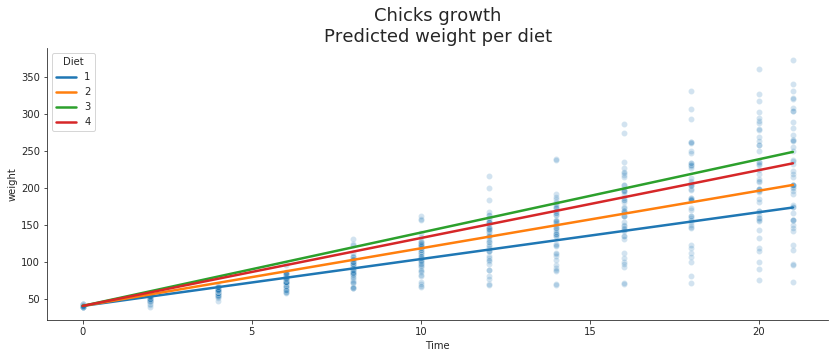

In [36]:
fig

#### Analisi dei residui

In [37]:
df_pred = df.copy()

df_pred['pred_weight'] = df_pred[['Time', 'Diet']].apply(lambda x: tt_reg_data[x['Diet']]['m']*x['Time'] + tt_reg_data[x['Diet']]['q'], axis=1)

df_pred.head()

,weight,Time,Chick,Diet,max_age,survived,pred_weight
0,42,0,1,1,21,1,41.066667
1,51,2,1,1,21,1,53.736295
2,59,4,1,1,21,1,66.405923
3,64,6,1,1,21,1,79.075551
4,76,8,1,1,21,1,91.745179


In [38]:
df_pred['residuals'] = df_pred['weight'] - df_pred['pred_weight']
df_pred.head()

,weight,Time,Chick,Diet,max_age,survived,pred_weight,residuals
0,42,0,1,1,21,1,41.066667,0.933333
1,51,2,1,1,21,1,53.736295,-2.736295
2,59,4,1,1,21,1,66.405923,-7.405923
3,64,6,1,1,21,1,79.075551,-15.075551
4,76,8,1,1,21,1,91.745179,-15.745179


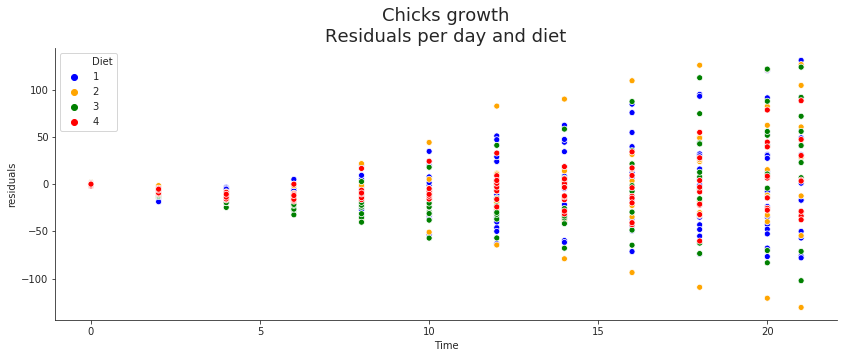

In [39]:
plt.figure(figsize=(14, 5))

sns.scatterplot(x='Time', y='residuals', hue='Diet', data=df_pred, palette=['blue', 'orange', 'green', 'red'])

plt.title('Chicks growth\nResiduals per day and diet', fontsize=18)
sns.despine()
plt.show()

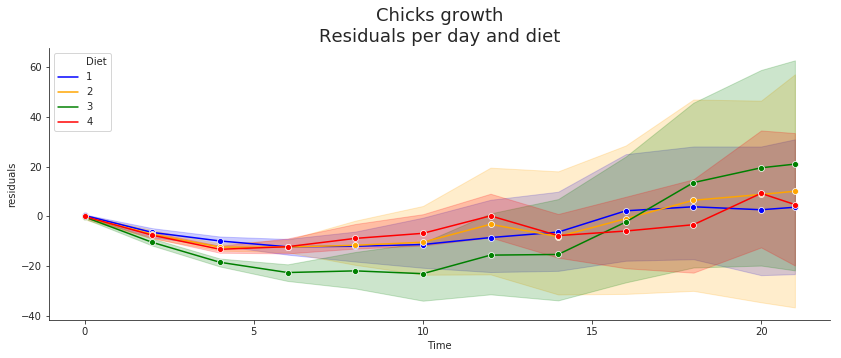

In [40]:
plt.figure(figsize=(14, 5))

sns.lineplot(x='Time', 
             y='residuals', 
             hue='Diet', 
             estimator='mean',
             #ci=False,
             data=df_pred, 
             marker='o',
             palette=['blue', 'orange', 'green', 'red'])

plt.legend(loc='upper left')
plt.title('Chicks growth\nResiduals per day and diet', fontsize=18)
sns.despine()
plt.show()

**I residui, come ci si attendeva in seguito all'eteroschedasticità del campione, presentano dipendenza rispetto al giorno di misurazione del peso**

#### Distribuzione dei residui

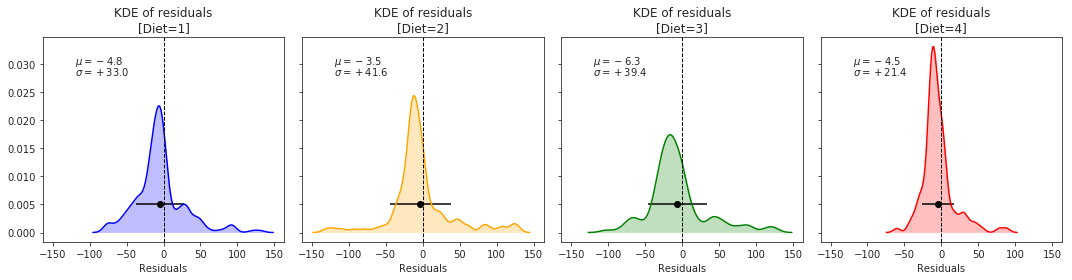

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(15, 4))

# Set the palette
palette=['blue', 'orange', 'green', 'red']

for n, diet in enumerate(df_pred['Diet'].unique()):
    mask = df_pred['Diet'] == diet
    sns.kdeplot(data=df_pred.loc[mask, 'residuals'], 
                shade=True, 
                legend=False,
                color=palette[n], 
                ax=ax[n])
    
    # Residuals mean
    mean = df_pred.loc[mask, 'residuals'].mean()
    
    # Residuals standard deviation
    stddev = df_pred.loc[mask, 'residuals'].std()
    
    # Draw standard deviation interval
    ax[n].errorbar(x=mean, y=0.005, xerr=stddev, fmt='o', color='k')
    ax[n].text(-120, 0.03, r'$\mu = {:+.1f}$'.format(mean), fontsize=10)
    ax[n].text(-120, 0.028, r'$\sigma = {:+.1f}$'.format(stddev), fontsize=10)
    
    # Ideal residual distribution would be around x=0
    ax[n].axvline(x=0, color='k', linestyle='--', linewidth=1)
    
    ax[n].set_title(f'KDE of residuals\n[Diet={diet}]')
    ax[n].set_xlabel('Residuals')

plt.tight_layout()

> **Si osserva uno shift costante verso i residui negativi (peso sovrastimato)**


> Risulta importante anche la **variabilità dei residui**. La dieta "4" è quella che induce nel modello una distribuzione dei residui con minore ampiezza. Dal picco molto vicino allo zero e dai risultati sulla metrica $R^2$, il modello fornisce previsioni molto accurate sul peso dei pulcini allevati con questa dieta

## Ricapitolando

**Tassi di mortalità**

In [42]:
for col in chicks_by_diet.columns:
    sur_rate = chicks_by_diet.loc[1, col] / chicks_by_diet.loc['All', col]
    n = int(chicks_by_diet.loc['All', col])
    print('Diet: {:3}\tchicks: {:2d}\tsurvival rate: {:7.2%}'.format(col, n, sur_rate))

Diet:   1	chicks: 20	survival rate:  80.00%
Diet:   2	chicks: 10	survival rate: 100.00%
Diet:   3	chicks: 10	survival rate: 100.00%
Diet:   4	chicks: 10	survival rate:  90.00%
Diet: All	chicks: 50	survival rate:  90.00%


**Tasso di crescita dei sopravvissuti**

In [43]:
for diet in chicks_alive['Diet'].unique():
    print('Diet {}\t - tt_reg Model\t - R-squared : {:.1%}\tm={:6.2f}\tq={:6.2f}\n'.format(diet, tt_reg_data[diet]['r2'],
                                                                                           tt_reg_data[diet]['m'],
                                                                                           tt_reg_data[diet]['q']))

Diet 1	 - tt_reg Model	 - R-squared : 65.5%	m=  6.33	q= 41.07

Diet 2	 - tt_reg Model	 - R-squared : 66.1%	m=  7.79	q= 41.07

Diet 3	 - tt_reg Model	 - R-squared : 78.7%	m=  9.91	q= 41.07

Diet 4	 - tt_reg Model	 - R-squared : 90.9%	m=  9.18	q= 41.07



### Conclusioni

*   Si scarta la dieta "1" dato il basso tasso di sopravvivenza che non è compensato da un elevato tasso di crescita per gli animali sopravvissuti
*   La differenza di tasso di sopravvivenza tra le altre diete è trascurabile data la bassa numerosità dei campioni
*   Rispetto al modello di regressione utilizzato, la dieta "4" è quella dall'andamento più facilmente prevedibile ($R^2\approx 91\%$) e con residui più stabili e quasi centrati attorno allo zero


**Si sceglie la DIETA "4" come quella dal miglior rapporto (aumento di peso atteso)/(variabilità del risultato)**



## Esercizi


1.   Si veda cos'è il coefficiente di variazione e come questo abbia "implicitamente" influito nella scelta della dieta. Se ne calcoli i valori per ogni dieta sulla base del grafico sulla KDE dei residui.


2.   Usando il modulo ``sklearn.preprocessing.PolynomialFeatures`` si applichi una regressione polinomiale anziché quella lineare semplice.


3.   Si costruisca un [modello autoregressivo](https://it.wikipedia.org/wiki/Modello_autoregressivo_a_eteroschedasticit%C3%A0_condizionata) utilizzando il modello ``LinearRegression``, ma introducendo come ulteriore covariata il peso del giorno precedente.  
     *Suggerimento*: interire nel dataframe la nuova colonna ``previous_weight`` indicante il peso del giorno precedente. Potrebbe risultare d'aiuto la funzione ``shift()`` di Pandas.

# Completed Notebook

In [44]:
import datetime
print('Completed running this Notebook at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Completed running this Notebook at: 2019-10-13 15:58:46
